In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

from matplotlib import animation
from matplotlib import cm
from mpl_toolkits import mplot3d

import os,sys

sys.path.append('/Users/ajc/Core/PyScript')
import readdata as rd
import seaborn as sns
import csv
import pandas as pd

In [2]:
path_root='/Users/ajc/FUSE/simulations/production/streams/'

In [3]:
dir_name=['SIM_18/S1_cT','SIM_18/S1_Denit']

Simulations = [os.path.join(path_root,d) for d in dir_name]

Sim_lab = ['Benchmark', 'ATS']

In [4]:
components = [(1,'Tracer1')]
Colors = ['r','k','b','g','gray']
marks = ['solid','dashed', 'dotted', 'dashdot']


In [5]:
# Mathematica's data
infile='/Users/ajc/Core/PostProcessing/ReactiveTransport/2021/BenchmarkData/ConservativeTracer.csv'
bm_cT = pd.read_csv(infile)
infile='/Users/ajc/Core/PostProcessing/ReactiveTransport/2021/BenchmarkData/BenchmarkBGC.csv'
bm_BGC = pd.read_csv(infile)
bm_components = ['Nitrate μM', 'DOC μM', 'DO μM']

In [6]:
bm_BGC

,time [hr],Nitrate μM,DOC μM,DO μM
0,0.00,0.000000e+00,-6.077163e-64,265.000000
1,0.25,8.828614e-25,1.547569e-24,244.169838
2,0.50,2.108132e-14,3.695257e-14,226.146773
3,0.75,5.261826e-09,9.222459e-09,210.846611
4,1.00,1.229101e-05,2.153823e-05,198.028408
...,...,...,...,...
284,71.00,1.850916e-01,5.220641e+02,124.374553
285,71.25,1.840406e-01,5.221135e+02,124.374539
286,71.50,1.830015e-01,5.221616e+02,124.374526
287,71.75,1.819741e-01,5.222086e+02,124.374513


In [10]:
#%matplotlib qt
outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/2021/Q2/'
to_micro = 1e+6
def get_discharge_fromfile(comp=1):
    fig, axs = plt.subplots(1,2, figsize=(8,3.2), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
    fig.subplots_adjust(hspace =.02, wspace=1.02)
    plt.tight_layout()
    axs = axs.ravel()
    to_micro = 1e+6
    for i,sim in enumerate(Simulations):
        
        infile = os.path.join(sim,'surface-outlet.dat')
        time = np.loadtxt(infile,usecols=0,skiprows=11)/(3600.*24)
        
        
        if i == 0:
            data = np.loadtxt(infile,usecols=1,skiprows=11)
            axs[i].plot(bm_cT['time [hr]']/24.,bm_cT['Normalized Breakthrough [-]'],color=Colors[0], linestyle=marks[1], label = Sim_lab[0])
            axs[i].plot(time,data,color=Colors[1], linestyle=marks[1], label = Sim_lab[1])
            axs[i].set_xlabel('Time [d]', fontsize=12,fontweight='normal')
            axs[i].set_ylabel('Normalized Concentration [-]', fontsize=12,fontweight='normal')
            axs[i].set_ylim(0,1)
            axs[i].legend(loc='upper right',fontsize=8)
            axs[i].set_yticks(np.arange(0,1.01,0.5))
        if i == 1:
            print (infile)
            # Nitrate
            data = np.loadtxt(infile,usecols=3,skiprows=11)*to_micro*1e-3
            axs[i].plot(bm_BGC['time [hr]']/24.,bm_BGC[bm_components[0]],color=Colors[0], linestyle=marks[0], label = Sim_lab[0])
            axs[i].plot(time,data,color=Colors[0], linestyle=marks[1], label = Sim_lab[1])
            axs[i].set_xlabel('Time [d]', fontsize=12,fontweight='normal')
            axs[i].set_ylabel('Nitrate concentration [$\mu$M]', fontsize=12,fontweight='normal')
            axs[i].set_ylim(0,300)
            axs[i].set_yticks(np.arange(0,301,150))
            
            #DOC
            data = np.loadtxt(infile,usecols=1,skiprows=11)*to_micro*1e-3
            axs[i].plot(bm_BGC['time [hr]']/24.,bm_BGC[bm_components[1]],color=Colors[1], linestyle=marks[0], label = Sim_lab[0])
            axs[i].plot(time,data,color=Colors[1], linestyle=marks[1], label = Sim_lab[1])
            axs[i].set_xlabel('Time [d]', fontsize=12,fontweight='normal')
            axs[i].set_ylabel('Nitrate concentration [$\mu$M]', fontsize=12,fontweight='normal')
            axs[i].set_ylim(0,700)
            axs[i].set_yticks(np.arange(0,701,100))
            
            
            #DO2
            data = np.loadtxt(infile,usecols=2,skiprows=11)*to_micro*1e-3
            axs[i].plot(bm_BGC['time [hr]']/24.,bm_BGC[bm_components[2]],color=Colors[2], linestyle=marks[0], label = Sim_lab[0])
            axs[i].plot(time,data,color=Colors[2], linestyle=marks[1], label = Sim_lab[1])
            axs[i].set_xlabel('Time [d]', fontsize=12,fontweight='normal')
            axs[i].set_ylabel('Nitrate concentration [$\mu$M]', fontsize=12,fontweight='normal')
            axs[i].set_ylim(0,700)
            axs[i].set_yticks(np.arange(0,701,100))
            axs[i].legend(loc='upper right',fontsize=8)
            
            axs[i].legend(loc='upper right',fontsize=8)
        axs[i].set_xlim(0,3)
        axs[i].set_xticks(np.arange(0,4,1))
            

    plt.tight_layout()
   
    #plt.savefig(outfile + 'benchmark_ats-A.png',dpi=200)



/Users/ajc/FUSE/simulations/production/streams/SIM_18/S1_Denit/surface-outlet.dat


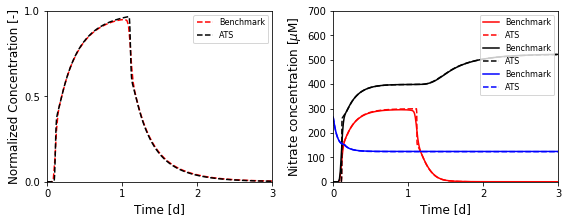

In [11]:
get_discharge_fromfile()

In [ ]:
ncells,length = 160, 2000
dx = length/(ncells)
area = dx*0.5
area,dx

In [ ]:
#%matplotlib qt
outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/2021/Q2/'
to_micro = 1e+6
def get_discharge_fromfileA(comp=1):
    fig, axs = plt.subplots(1,1, figsize=(4,3), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
    fig.subplots_adjust(hspace =.02, wspace=1.02)
    plt.tight_layout()
    #axs = axs.ravel()
    to_micro = 1e+6
    for i,sim in enumerate(Simulations[1:]):
        
        infile = os.path.join(sim,'surface-outlet.dat')
        time = np.loadtxt(infile,usecols=0,skiprows=11)/(3600.*24)
        
        # Nitrate
        data = np.loadtxt(infile,usecols=3,skiprows=11)*to_micro*1e-3
        axs.plot(bm_BGC['time [hr]']/24.,bm_BGC[bm_components[0]],color=Colors[0], linestyle=marks[0], label = Sim_lab[0])
        axs.plot(time,data,color=Colors[0], linestyle=marks[1], label = Sim_lab[1])
        axs.set_xlabel('Time [d]', fontsize=12,fontweight='normal')
        axs.set_ylabel('Nitrate concentration [$\mu$M]', fontsize=12,fontweight='normal')
        axs.set_ylim(0,300)
        axs.set_yticks(np.arange(0,301,150))

        #DOC
        data = np.loadtxt(infile,usecols=1,skiprows=11)*to_micro*1e-3
        axs.plot(bm_BGC['time [hr]']/24.,bm_BGC[bm_components[1]],color=Colors[1], linestyle=marks[0], label = Sim_lab[0])
        axs.plot(time,data,color=Colors[1], linestyle=marks[1], label = Sim_lab[1])
        axs.set_xlabel('Time [d]', fontsize=12,fontweight='normal')
        axs.set_ylabel('Nitrate concentration [$\mu$M]', fontsize=12,fontweight='normal')
        axs.set_ylim(0,700)
        axs.set_yticks(np.arange(0,701,100))


        #DO2
        data = np.loadtxt(infile,usecols=2,skiprows=11)*to_micro*1e-3
        axs.plot(bm_BGC['time [hr]']/24.,bm_BGC[bm_components[2]],color=Colors[2], linestyle=marks[0], label = Sim_lab[0])
        axs.plot(time,data,color=Colors[2], linestyle=marks[1], label = Sim_lab[1])
        axs.set_xlabel('Time [d]', fontsize=12,fontweight='normal')
        axs.set_ylabel('Concentration [$\mu$M]', fontsize=12,fontweight='normal')
        axs.set_ylim(0,600)
        axs.set_yticks(np.arange(0,601,150))
        #axs.legend(loc='upper right',fontsize=8)

        #axs.legend(loc='upper right',fontsize=8)
    axs.set_xlim(0,3)
    axs.set_xticks(np.arange(0,4,1))
            

    plt.tight_layout()
   
    plt.savefig(outfile + 'benchmark_ats-A.png',dpi=200)




In [ ]:
get_discharge_fromfileA()